In [1]:
import cv2
import onnx
import netron
import onnxruntime
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Convert from tensorflow saved graph with 
```
python -m tf2onnx.convert --graphdef DetectionPi/sample/saved_model.pb --outputs "detection_boxes:0,"detection_scores:0""  --inputs "image_tensor:0",  --output DetectionPi/sample/model.onnx --opset 11
```

In [ ]:
model = onnx.load('sample/model.onnx')
print('Model :\n\n{}'.format(onnx.helper.printable_graph(model.graph)))

In [3]:
session = onnxruntime.InferenceSession('sample/model.onnx', None)

In [4]:
input_name = session.get_inputs()[0].name
output_name = (session.get_outputs()[0].name, session.get_outputs()[1].name)
input_name, output_name

('image_tensor:0', ('detection_boxes:0', 'detection_scores:0'))

In [5]:
netron.start('sample/model.onnx', address=10001)

Serving 'sample/model.onnx' at http://localhost:10001


('localhost', 10001)

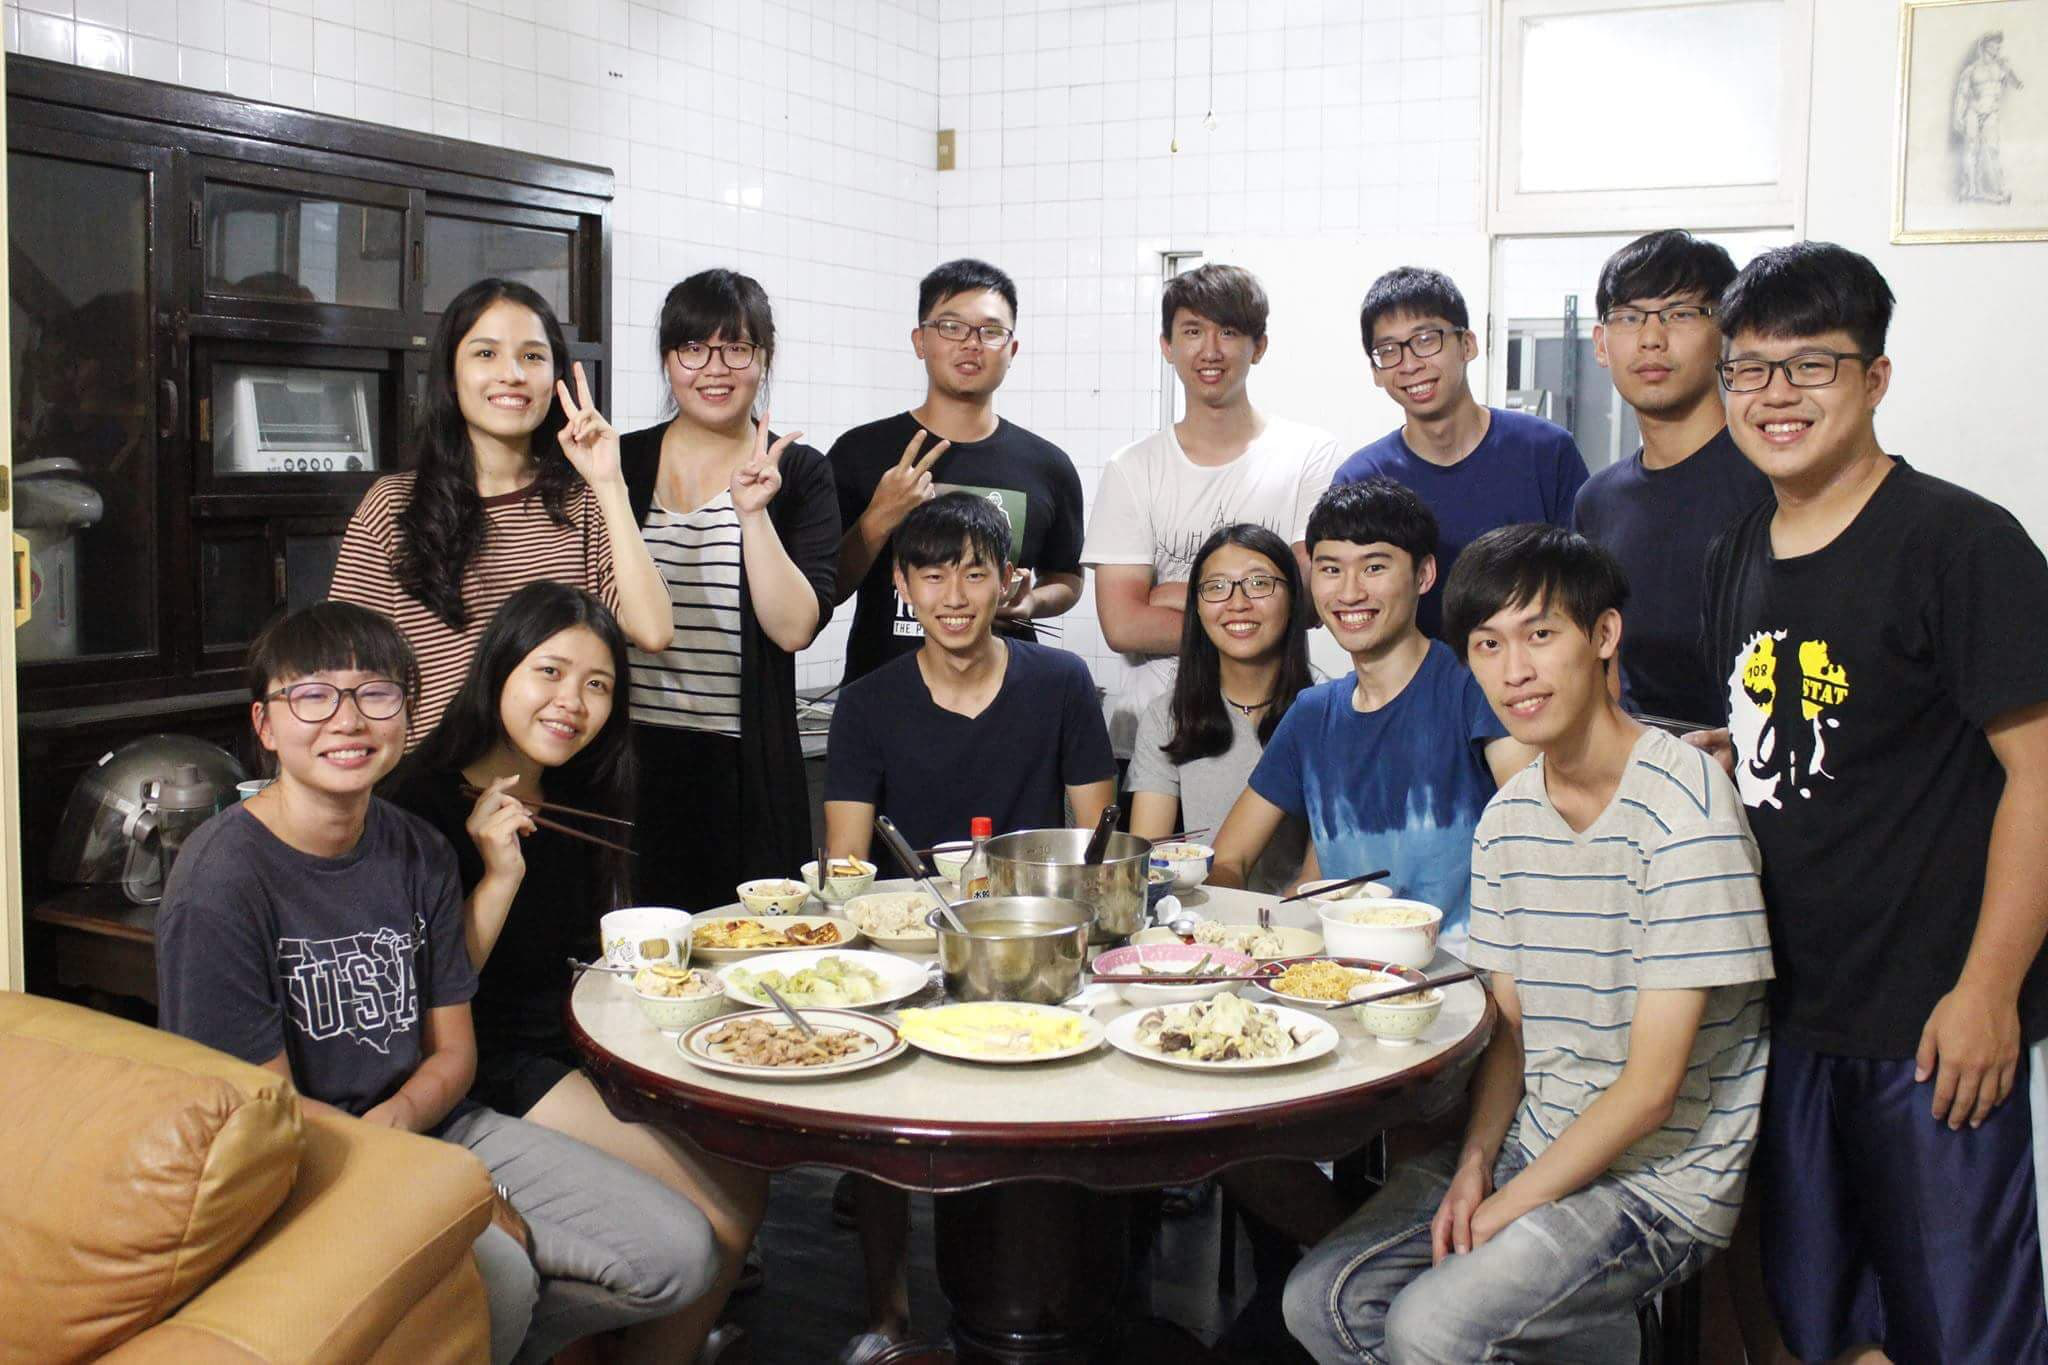

In [6]:
img = Image.open('lifemate.jpg')
img

In [7]:
img = cv2.resize(cv2.imread('lifemate.jpg'), (300, 300))

In [8]:
boxes, scores = session.run(['detection_boxes:0', 'detection_scores:0'], {'image_tensor:0': [img]})

In [9]:
boxes[0]

array([[0.23048806, 0.22148623, 0.3182875 , 0.26963195],
       [0.22375202, 0.84053487, 0.3327976 , 0.91077524],
       [0.20625603, 0.7868006 , 0.30728298, 0.8431349 ],
       [0.21140257, 0.45068946, 0.29192445, 0.48925212],
       [0.43971884, 0.7230666 , 0.54244286, 0.78104216],
       [0.23074901, 0.3269737 , 0.30783635, 0.3660209 ],
       [0.46702853, 0.14046085, 0.5727091 , 0.22087237],
       [0.23112893, 0.5720575 , 0.30478817, 0.60836375],
       [0.39737165, 0.6444217 , 0.47739738, 0.6883912 ],
       [0.41385096, 0.5851128 , 0.48187983, 0.62355673],
       [0.21992333, 0.66742724, 0.29769263, 0.7052434 ],
       [0.23450813, 0.67132294, 0.30765095, 0.71293116],
       [0.4888891 , 0.2505302 , 0.55398   , 0.3007531 ],
       [0.3961272 , 0.43372318, 0.4737439 , 0.48110542],
       [0.21293716, 0.5709524 , 0.2888815 , 0.600335  ],
       [0.21507244, 0.46172062, 0.29138827, 0.49810204],
       [0.21728331, 0.21932106, 0.2970909 , 0.2615885 ],
       [0.23395939, 0.08028746,

<Figure size 432x288 with 0 Axes>

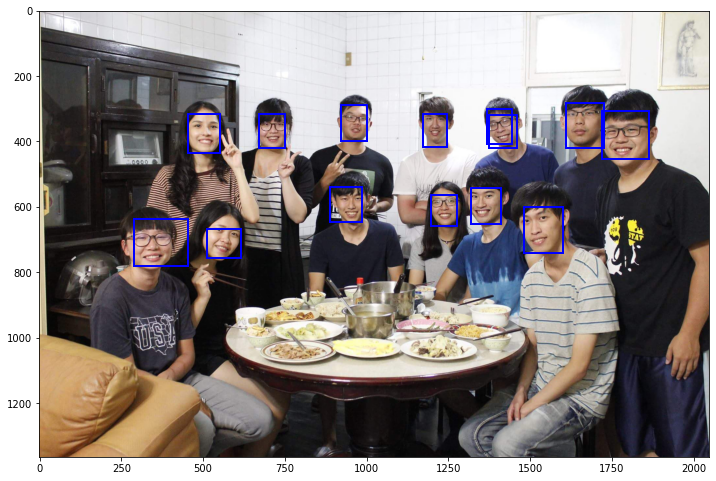

In [10]:
plt.figure()
fig, ax = plt.subplots(1, figsize=(12,9))
img = Image.open('lifemate.jpg')
ax.imshow(img)

width, height = img.size
for idx, box in enumerate(boxes[0]):
    if scores[0][idx] < 0.14:
        continue

    x = box[1] * width
    y = box[0] * height
    box_w = (box[3] - box[1]) * width
    box_h = (box[2] - box[0]) * height
    bbox = patches.Rectangle((x, y), box_w, box_h,
             linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(bbox)